In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 40 , 32

C:\Users\SUPRAJA GARLAPATI\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv('C:/Users/SUPRAJA GARLAPATI/Downloads/Rossman/train.csv')
test = pd.read_csv('C:/Users/SUPRAJA GARLAPATI/Downloads/Rossman/test.csv')
    
full = train.append( test , ignore_index = True )
trainData = full[ :1017210 ]
testData = full [1017211: ]                   
del train , test

print ('Datasets:' , 'full:' , full.shape , 'trainData:' , trainData.shape)
print ('Datasets:' , 'full:' , full.shape , 'testData:' , testData.shape)

('Datasets:', 'full:', (1058297, 10), 'trainData:', (1017210, 10))
('Datasets:', 'full:', (1058297, 10), 'testData:', (41086, 10))


In [7]:
def count_unique(column):
    return len(column.unique())

trainData.apply(count_unique, axis=0).astype(np.int32)


Customers           4087
Date                 943
DayOfWeek              7
Id               1017209
Open                   2
Promo                  2
Sales              21735
SchoolHoliday          2
StateHoliday           5
Store               1115
dtype: int32

In [6]:
testData.apply(count_unique, axis=0).astype(np.int32)

Customers            1
Date                48
DayOfWeek            7
Id               41086
Open                 3
Promo                2
Sales                1
SchoolHoliday        2
StateHoliday         2
Store              856
dtype: int32

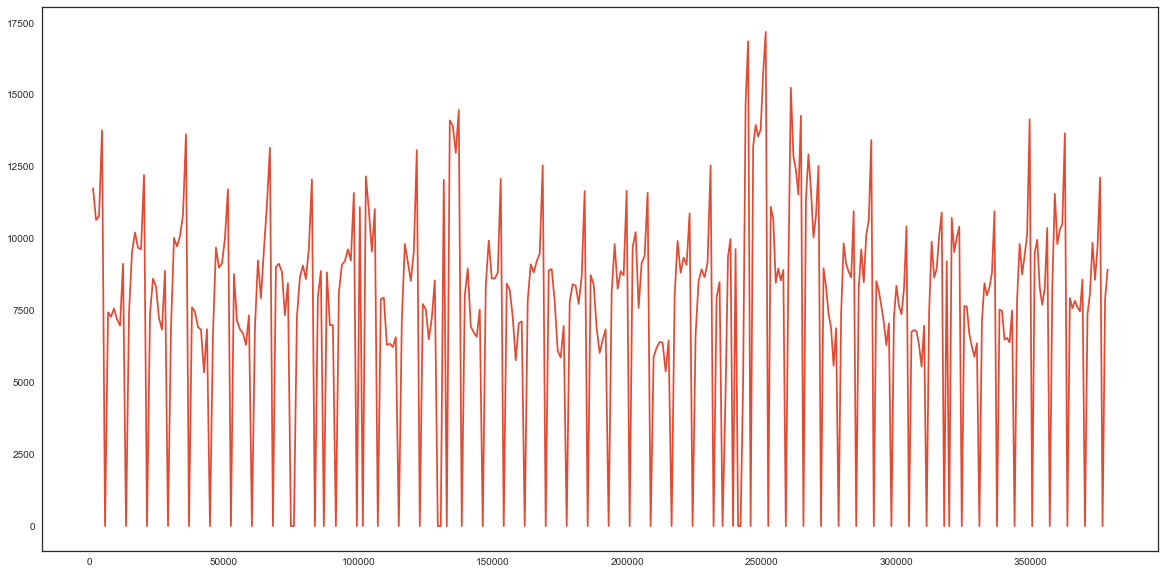

In [8]:
store_data = trainData[trainData.Store==150].sort_index()
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales[1:365:1])


In [9]:
trainData.dtypes

Customers        float64
Date              object
DayOfWeek          int64
Id                 int64
Open             float64
Promo              int64
Sales            float64
SchoolHoliday      int64
StateHoliday      object
Store              int64
dtype: object

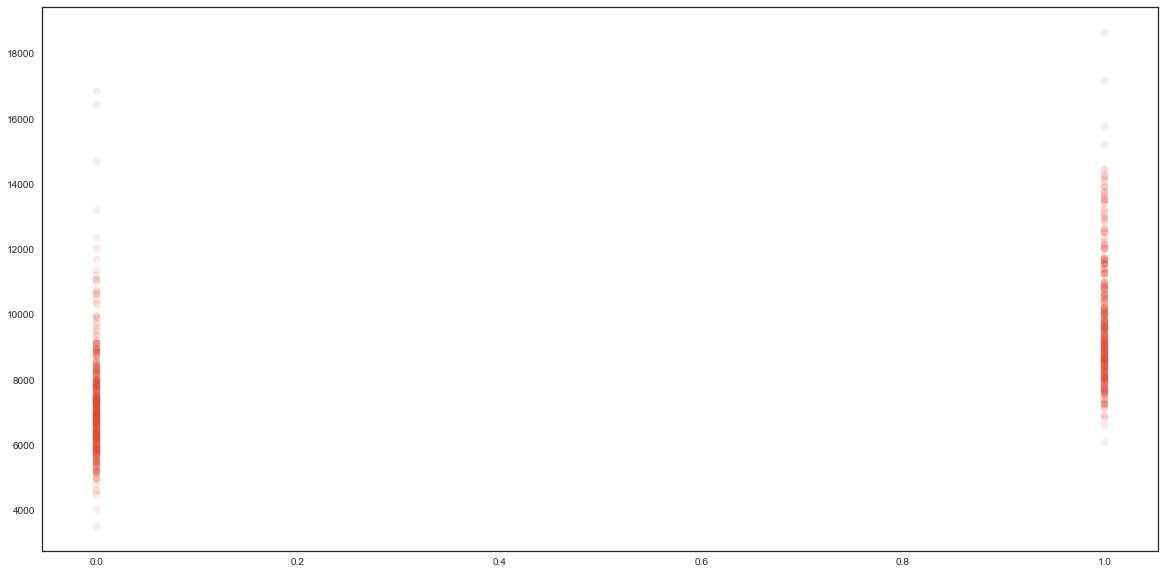

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[trainData.Open==1].Promo, y=store_data[trainData.Open==1].Sales, alpha=0.1)

In [11]:
transformed_data = trainData.drop(['Store', 'Date', 'Customers'], axis=1)

In [12]:
transformed_data

,DayOfWeek,Id,Open,Promo,Sales,SchoolHoliday,StateHoliday
0,5,1,1.0,1,5263.0,1,0
1,5,2,1.0,1,6064.0,1,0
2,5,3,1.0,1,8314.0,1,0
3,5,4,1.0,1,13995.0,1,0
4,5,5,1.0,1,4822.0,1,0
5,5,6,1.0,1,5651.0,1,0
6,5,7,1.0,1,15344.0,1,0
7,5,8,1.0,1,8492.0,1,0
8,5,9,1.0,1,8565.0,1,0
9,5,10,1.0,1,7185.0,1,0


In [13]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [14]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 1017210 examples and 16 features.


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [156]:
lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.55 (+/- 0.00)


In [163]:
lr = LinearRegression()
X_store = pd.get_dummies(trainData[trainData.Store!=2], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(trainData[trainData.Store!=2], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)
y_store_predict

array([  8.59938049e+03,   8.28069269e+03,   8.24922037e+03,
         8.61110722e+03,   9.68418492e+03,   2.93810120e+02,
         6.16880512e+03,   6.37068371e+03,   6.05199590e+03,
         6.02052359e+03,   6.38241043e+03,   7.45548813e+03,
         2.89886179e+02,   6.16488118e+03,   8.33860258e+03,
         8.01991477e+03,   7.98844246e+03,   8.35032930e+03,
         9.42340700e+03,   2.85962239e+02,   6.16095724e+03,
         6.10990579e+03,   5.79121799e+03,   5.75974567e+03,
         6.12163251e+03,   7.19471022e+03,   2.82038298e+02,
         6.15703330e+03,   8.33075470e+03,   8.01206689e+03,
         7.98059458e+03,   8.34248142e+03,   9.41555912e+03,
         2.78114358e+02,   6.15310936e+03,   6.10205791e+03,
         5.78337010e+03,   5.75189779e+03,   6.11378463e+03,
         7.18686234e+03,   2.74190417e+02,   6.14918542e+03,
         8.32290682e+03,   8.00421901e+03,   7.97274670e+03,
         8.33463354e+03,   9.40771124e+03,   2.70266477e+02,
         6.14526147e+03,

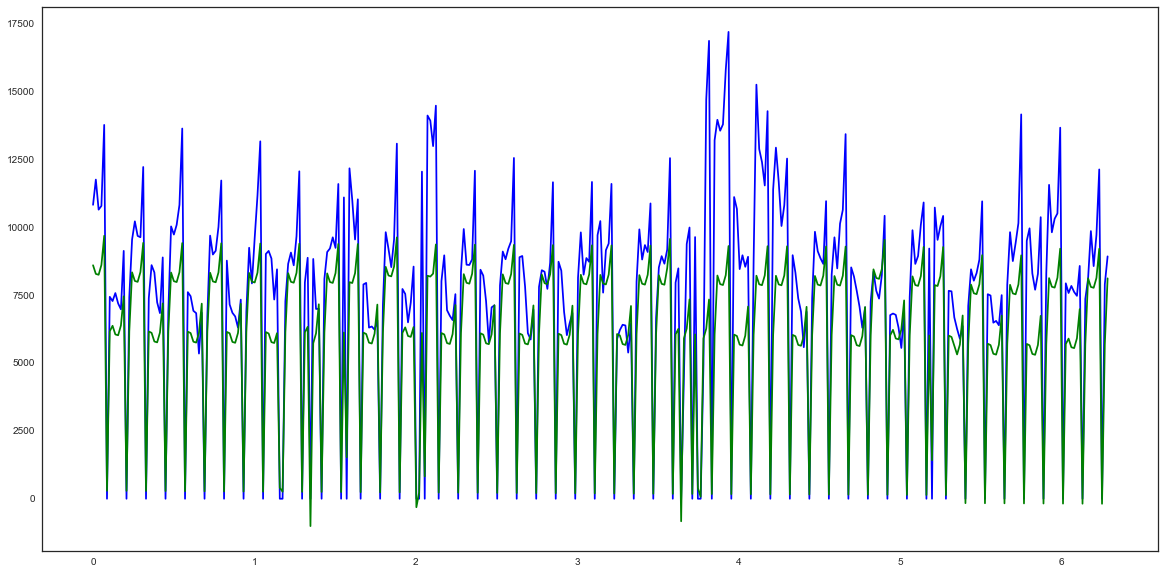

In [171]:
from numpy import *
import math
import matplotlib.pyplot as plt
t = linspace(0,2*math.pi,365)
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(t,store_data.Sales[:365], label="ground truth", color='blue')
plt.plot(t,y_store_predict[:365], label="prediction", color='red')
plt.show()